# EDA and Data Preprocessing on Google App Store Rating Dataset.

# Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading the CSV file into a DataFrame

df = pd.read_csv('C:/Users/user/my_projects/GooglePlay Store Apps_data Project.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2) Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
# Printing the first few samples of the data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Printing the shape of the data

print('Shape of the data:', df.shape)

Shape of the data: (10841, 13)


In [6]:
# Printing the information about the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


# 3) Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [7]:
# Printing the summary statistics of the data

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.select_dtypes(include=['object']).columns.tolist()

#the categorical columns are category,reviews,installs,price,content,size,etc
# you must convert this categorical columns into numerical columns then only it will be useful for model building

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

# 4. Check if there are any duplicate records in the dataset? if any drop them.

In [9]:
df.duplicated().sum()

483

In [10]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [11]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
df = df.drop(df[df['Category'] == '1.9'].index)

In [13]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new

In [15]:
df['Rating'].isnull().sum()

1474

In [16]:
df = df.dropna(subset=['Rating'])

In [17]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [18]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating > 3.5:
        return 'high'
    else:
        return 'low'

# Create a new column called Rating_category
df['Rating_category'] = df['Rating'].apply(categorize_rating)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\1471818660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rating_category'] = df['Rating'].apply(categorize_rating)


In [19]:
df['Rating_category'].count()

9366

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [20]:
# Checking the distribution of the newly created column 'Rating_category'

df['Rating_category'].value_counts()

high    8470
low      896
Name: Rating_category, dtype: int64

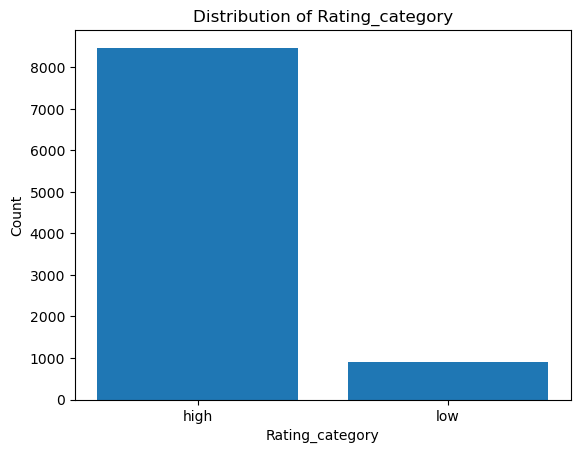

In [21]:
# Count the number of occurrences of each category
rating_counts = df['Rating_category'].value_counts()

# Plot a bar chart of the distribution
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Rating_category')
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

In [22]:
#The distribution of the rating category column indicates that the majority of apps in the dataset have low ratings. This suggests that most apps in the dataset may not be very popular or well-received by users.

# 8. Convert the column "Reviews" to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\360184558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews'] = df['Reviews'].astype(float)


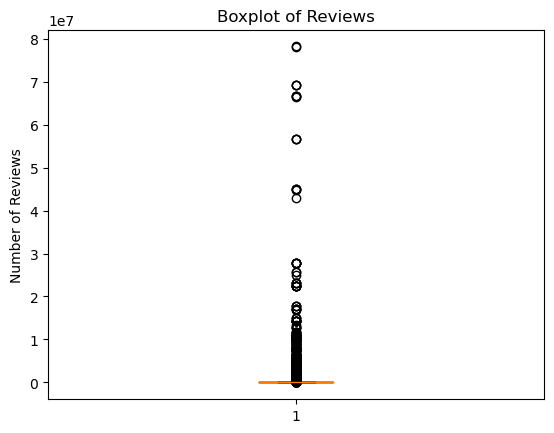

In [25]:
# Convert the Reviews column to a float data type
df['Reviews'] = df['Reviews'].astype(float)

# Plot a boxplot of the Reviews column to check for outliers
plt.boxplot(df['Reviews'])
plt.title('Boxplot of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

In [26]:
# Apply a log transformation to the Reviews column
df['Reviews_log'] = np.log(df['Reviews'])

C:\Users\user\AppData\Local\Temp\ipykernel_7020\1568217075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews_log'] = np.log(df['Reviews'])


In [27]:
df['Reviews_log']

0         5.068904
1         6.874198
2        11.379508
3        12.281384
4         6.874198
           ...    
10834     1.945910
10836     3.637586
10837     1.386294
10839     4.736198
10840    12.894978
Name: Reviews_log, Length: 9366, dtype: float64

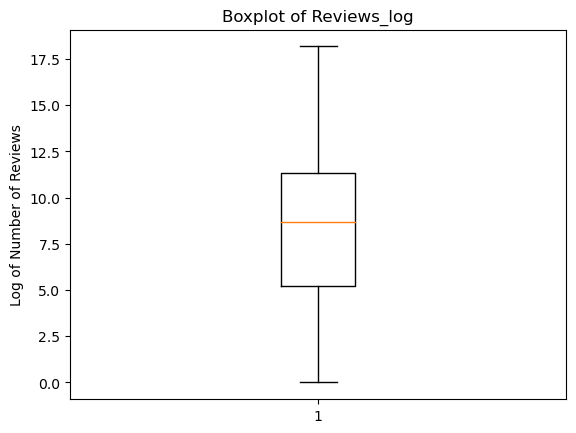

In [28]:
# Plot a boxplot of the transformed Reviews_log column
plt.boxplot(df['Reviews_log'])
plt.title('Boxplot of Reviews_log')
plt.ylabel('Log of Number of Reviews')
plt.show()

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [29]:
# Replace 'M' with '1000000' and 'K' with '1000'
df['Size'] = df['Size'].replace(['M','k'], ['1000000', '1000'], regex=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\3780346050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].replace(['M','k'], ['1000000', '1000'], regex=True)


In [30]:
df['Size']

0                 191000000
1                 141000000
2                8.71000000
3                 251000000
4                2.81000000
                ...        
10834            2.61000000
10836             531000000
10837            3.61000000
10839    Varies with device
10840             191000000
Name: Size, Length: 9366, dtype: object

In [31]:
# Drop rows where Size is 'Varies with device'
df = df[df['Size'] != 'Varies with device']

In [32]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category,Reviews_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,191000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high,5.068904
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,141000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high,6.874198
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.71000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high,11.379508
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,251000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high,12.281384
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.81000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high,6.874198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,6191000,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high,3.784190
10834,FR Calculator,FAMILY,4.0,7.0,2.61000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high,1.945910
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,531000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high,3.637586
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.61000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high,1.386294


In [33]:
# Convert Size column to float data type
df['Size'] = df['Size'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\880957533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['Size'].astype(float)


In [34]:
df['Size']

0        1.910000e+08
1        1.410000e+08
2        8.710000e+00
3        2.510000e+08
4        2.810000e+00
             ...     
10833    6.191000e+06
10834    2.610000e+00
10836    5.310000e+08
10837    3.610000e+00
10840    1.910000e+08
Name: Size, Length: 7729, dtype: float64

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [35]:
# Remove '+' and ',' characters from Installs column
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

C:\Users\user\AppData\Local\Temp\ipykernel_7020\1080113601.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')
C:\Users\user\AppData\Local\Temp\ipykernel_7020\1080113601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].str.replace('+', '')
C:\Users\user\AppData\Local\Temp\ipykernel_7020\1080113601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [36]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7729, dtype: object

In [37]:
# Convert Installs column to integer data type
df['Installs'] = df['Installs'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\2275305630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Installs'] = df['Installs'].astype(int)


In [38]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7729, dtype: int32

# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [39]:
# Remove '$' character from Price column
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\user\AppData\Local\Temp\ipykernel_7020\929786959.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')
C:\Users\user\AppData\Local\Temp\ipykernel_7020\929786959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('$', '')


In [40]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Price, Length: 7729, dtype: object

In [41]:
# Convert Price column to float data type
df['Price'] = df['Price'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_7020\3427182786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


In [42]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7729, dtype: float64

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [43]:
df = df.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [44]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category,Reviews_log
0,ART_AND_DESIGN,159.0,1.910000e+08,10000,Free,0.0,Everyone,high,5.068904
1,ART_AND_DESIGN,967.0,1.410000e+08,500000,Free,0.0,Everyone,high,6.874198
2,ART_AND_DESIGN,87510.0,8.710000e+00,5000000,Free,0.0,Everyone,high,11.379508
3,ART_AND_DESIGN,215644.0,2.510000e+08,50000000,Free,0.0,Teen,high,12.281384
4,ART_AND_DESIGN,967.0,2.810000e+00,100000,Free,0.0,Everyone,high,6.874198
...,...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,44.0,6.191000e+06,1000,Free,0.0,Everyone,high,3.784190
10834,FAMILY,7.0,2.610000e+00,500,Free,0.0,Everyone,high,1.945910
10836,FAMILY,38.0,5.310000e+08,5000,Free,0.0,Everyone,high,3.637586
10837,FAMILY,4.0,3.610000e+00,100,Free,0.0,Everyone,high,1.386294


# 13. Encode the categorical columns.

In [45]:
# Import LabelEncoder class from scikit-learn library
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Encode Category column
df['Category'] = le.fit_transform(df['Category'])

# Encode Type column
df['Type'] = le.fit_transform(df['Type'])

# Encode Content rating column
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [46]:
df['Category']

0         0
1         0
2         0
3         0
4         0
         ..
10833     3
10834    11
10836    11
10837    11
10840    18
Name: Category, Length: 7729, dtype: int32

In [47]:
df['Type']

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Type, Length: 7729, dtype: int32

In [48]:
df['Content Rating']

0        1
1        1
2        1
3        4
4        1
        ..
10833    1
10834    1
10836    1
10837    1
10840    1
Name: Content Rating, Length: 7729, dtype: int32

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [49]:
# Segregate the target and independent features
X = df.drop(['Rating_category'], axis=1) # independent features
y = df['Rating_category'] # target variable

In [50]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Reviews_log
0,0,159.0,1.910000e+08,10000,0,0.0,1,5.068904
1,0,967.0,1.410000e+08,500000,0,0.0,1,6.874198
2,0,87510.0,8.710000e+00,5000000,0,0.0,1,11.379508
3,0,215644.0,2.510000e+08,50000000,0,0.0,4,12.281384
4,0,967.0,2.810000e+00,100000,0,0.0,1,6.874198
...,...,...,...,...,...,...,...,...
10833,3,44.0,6.191000e+06,1000,0,0.0,1,3.784190
10834,11,7.0,2.610000e+00,500,0,0.0,1,1.945910
10836,11,38.0,5.310000e+08,5000,0,0.0,1,3.637586
10837,11,4.0,3.610000e+00,100,0,0.0,1,1.386294


In [52]:
y

0        high
1        high
2        high
3        high
4        high
         ... 
10833    high
10834    high
10836    high
10837    high
10840    high
Name: Rating_category, Length: 7729, dtype: object

# 15. Split the dataset into train and test.

In [53]:
# Import train_test_split function from scikit-learn library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X_train, X_test, y_train, y_test

(       Category   Reviews          Size  Installs  Type  Price  \
 8421         11  157997.0  2.710000e+08  10000000     0   0.00   
 8216         29       7.0  5.210000e+00       500     0   0.00   
 6540         17      53.0  3.341000e+06     10000     0   0.00   
 101           2    1739.0  2.110000e+08    500000     0   0.00   
 4937         29     566.0  2.710000e+08    100000     0   0.00   
 ...         ...       ...           ...       ...   ...    ...   
 7415         14   29990.0  9.610000e+08   1000000     0   0.00   
 7619         14    3904.0  5.510000e+00     10000     1   2.99   
 1260         15  272337.0  1.310000e+08  10000000     0   0.00   
 10638        19      63.0  1.610000e+00     10000     0   0.00   
 10167        29    1420.0  1.610000e+00    100000     0   0.00   
 
        Content Rating  Reviews_log  
 8421                1    11.970331  
 8216                1     1.945910  
 6540                1     3.970292  
 101                 1     7.461066  
 493

# 16. Standardize the data, so that the values are within a particular range.

In [55]:
# Import StandardScaler class from scikit-learn library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [56]:
X_train_std

array([[-0.68773688, -0.07202213,  0.24033329, ..., -0.06466919,
        -0.46833733,  1.14401379],
       [ 1.5291389 , -0.16157325, -0.85118787, ..., -0.06466919,
        -0.46833733, -1.5382878 ],
       [ 0.05122171, -0.16154718, -0.83773117, ..., -0.06466919,
        -0.46833733, -0.9966104 ],
       ...,
       [-0.19509782, -0.00721249, -0.32355219, ..., -0.06466919,
        -0.46833733,  1.28969973],
       [ 0.29754124, -0.16154151, -0.85118789, ..., -0.06466919,
        -0.46833733, -0.95036169],
       [ 1.5291389 , -0.16077234, -0.85118789, ..., -0.06466919,
        -0.46833733, -0.11678602]])

In [57]:
X_test_std

array([[ 1.40597913, -0.16151997, -0.85118788, ..., -0.06466919,
        -0.46833733, -0.82406929],
       [-0.68773688, -0.16152224, -0.85118788, ..., -0.06466919,
        -0.46833733, -0.83488194],
       [-1.54985524, -0.16156928, -0.85118788, ..., -0.06466919,
        -0.46833733, -1.35281776],
       ...,
       [ 0.79018031, -0.14694942, -0.85118787, ..., -0.06466919,
        -0.46833733,  0.65918345],
       [ 1.5291389 , -0.16156871, -0.84200059, ..., -0.06466919,
        -0.46833733, -1.33435688],
       [-0.68773688, -0.15973337, -0.85118788, ..., -0.06466919,
        -0.46833733,  0.10501387]])